# Problem Statement 1 Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Data Dictionary:

Variable Name	Description

Carat	 Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = 
flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.

X	 Length of the cubic zirconia in mm.

Y	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.


In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cubic_zirconia.csv")  

##### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

### EDA

In [4]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
# drop the "Unnamed: 0" column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.shape

(26967, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [8]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


### unique values for categorical variables

In [107]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

### Converting Instant_bookable from 'f' and 't' to boolean

In [108]:
#df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [109]:
#df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
# Are there any missing values ?
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Drop missing values

In [11]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Checking for duplicates

In [12]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 34


In [13]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


In [14]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

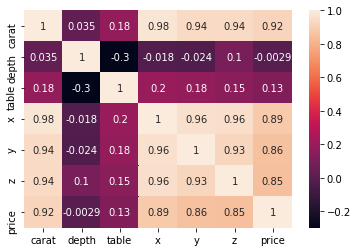

In [15]:
sns.heatmap(df.corr(),annot=True)
#plt.gcf().set_size_inches(29, 15)
plt.show()

### Covariance Plot

In [16]:
df.cov()

,carat,depth,table,x,y,z,price
carat,0.227755,0.023724,0.193388,0.525571,0.523441,0.323315,1.770758e+03
depth,0.023724,1.994429,-0.938126,-0.029269,-0.040241,0.100607,-1.643333e+01
table,0.193388,-0.938126,4.982523,0.493865,0.474215,0.239445,1.138925e+03
x,0.525571,-0.029269,0.493865,1.270955,1.264303,0.776348,4.020423e+03
y,0.523441,-0.040241,0.474215,1.264303,1.357312,0.779000,4.013644e+03
z,0.323315,0.100607,0.239445,0.776348,0.779000,0.518348,2.463654e+03
price,1770.758399,-16.433328,1138.925074,4020.423164,4013.643872,2463.653531,1.618092e+07


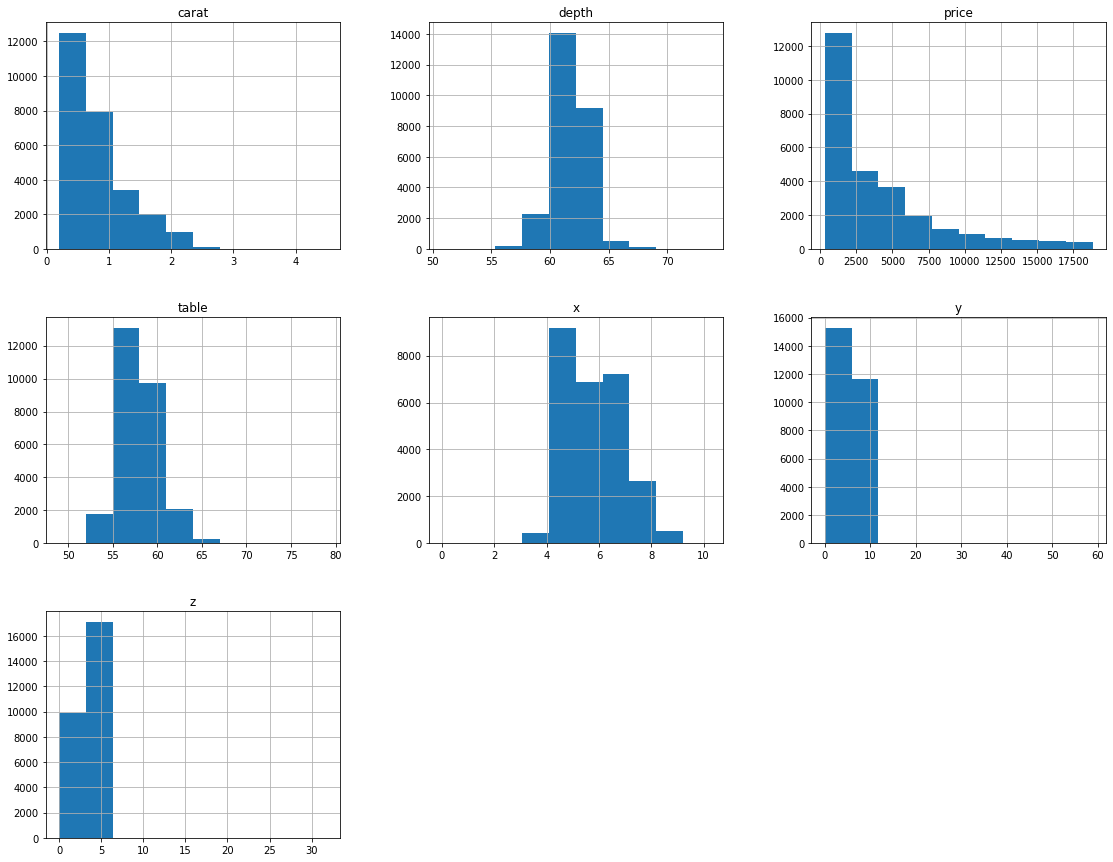

In [177]:
df.hist(figsize=(19,15));

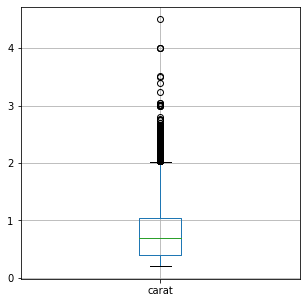

In [182]:
df.boxplot(column="carat",return_type='axes',figsize=(5,5));

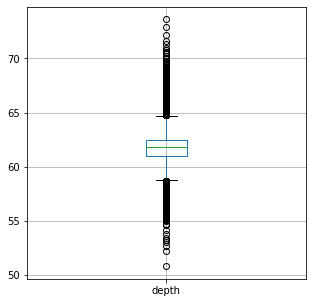

In [186]:
df.boxplot(column="depth",return_type='axes',figsize=(5,5));

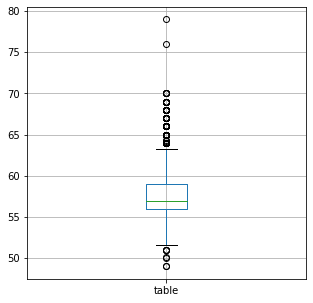

In [187]:
df.boxplot(column="table",return_type='axes',figsize=(5,5));

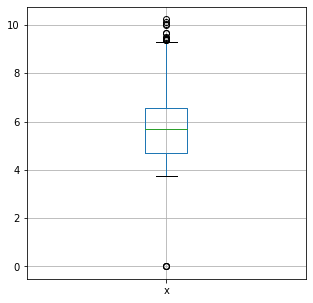

In [188]:
df.boxplot(column="x",return_type='axes',figsize=(5,5));

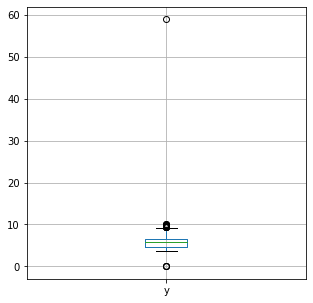

In [189]:
df.boxplot(column="y",return_type='axes',figsize=(5,5));

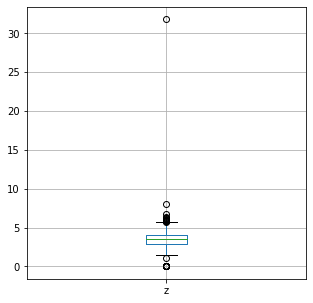

In [190]:
df.boxplot(column="z",return_type='axes',figsize=(5,5));

### Bivariate Analysis

In [17]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

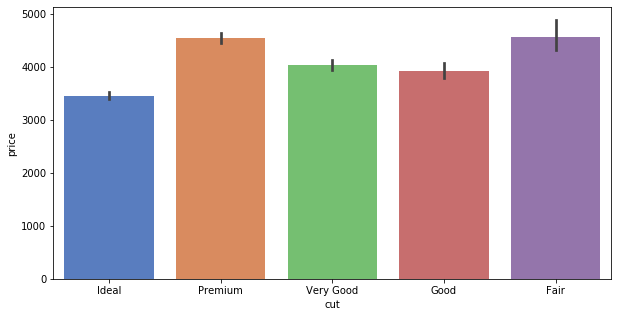

In [22]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='cut', y='price', data=df, palette='muted')  # barplot

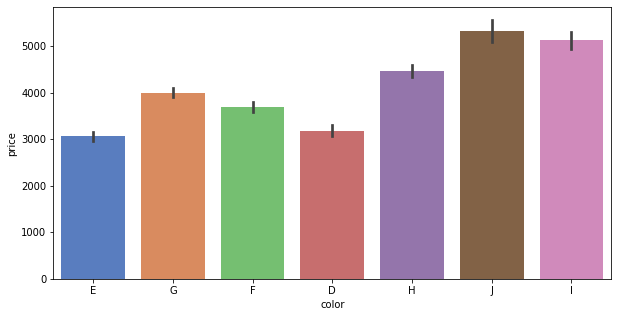

In [23]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='color', y='price', data=df, palette='muted')  # barplot

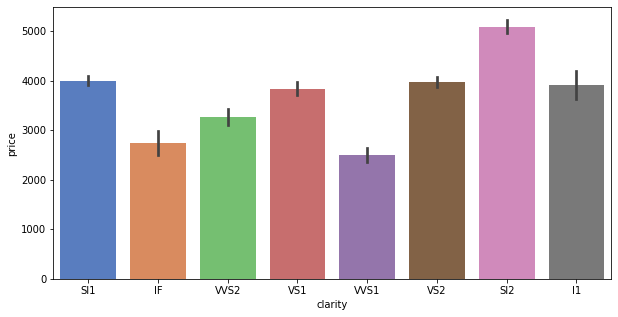

In [25]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='clarity', y='price', data=df, palette='muted')  # barplot

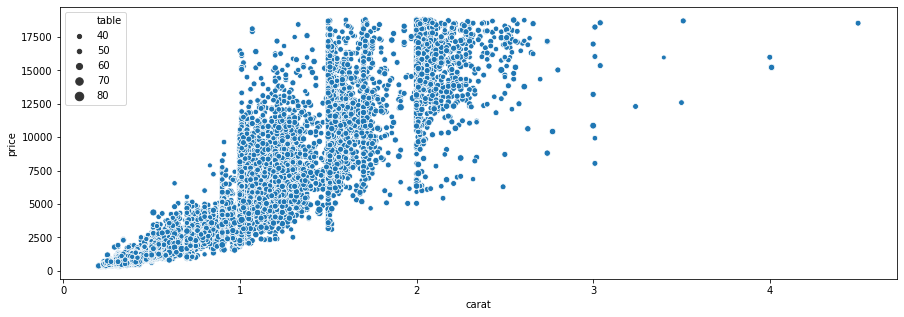

In [27]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['carat'],y='price', data=df, size = "table") # scatter plot

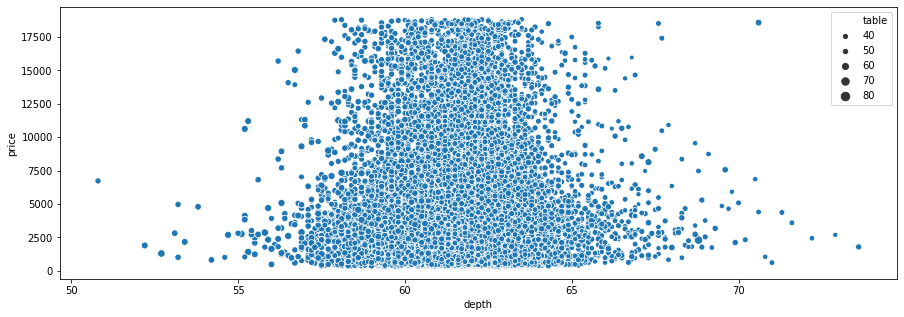

In [28]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['depth'],y='price', data=df, size = "table") # scatter plot

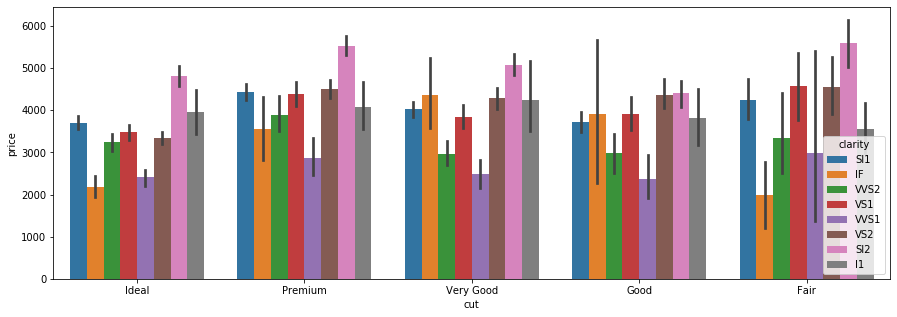

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='cut',y='price',hue='clarity')
plt.show()

In [30]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

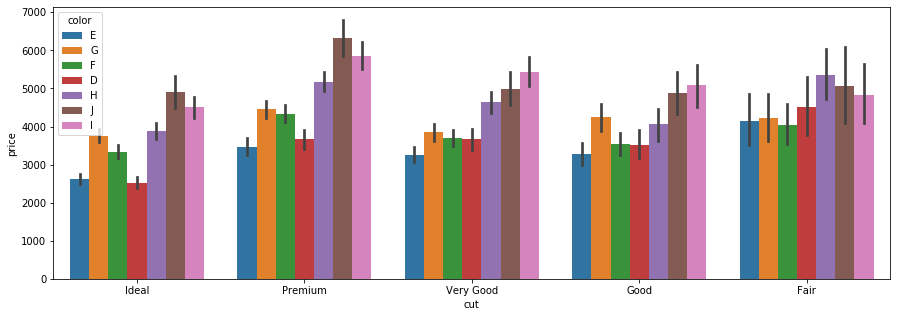

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='cut',y='price',hue='color')
plt.show()

### Outlier Checks

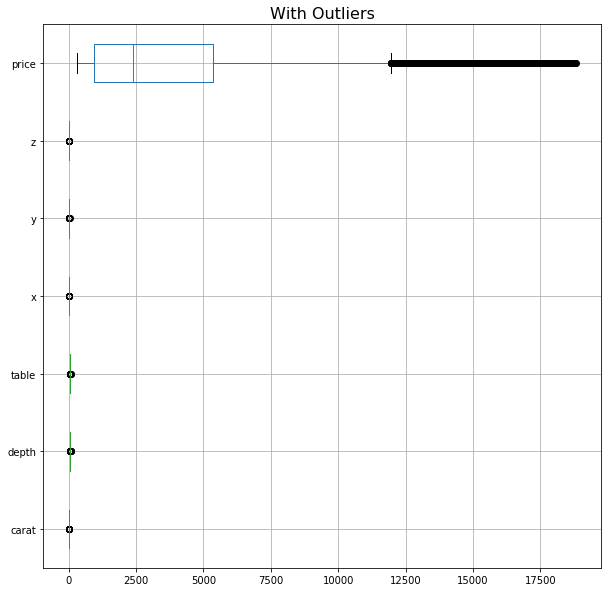

In [121]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

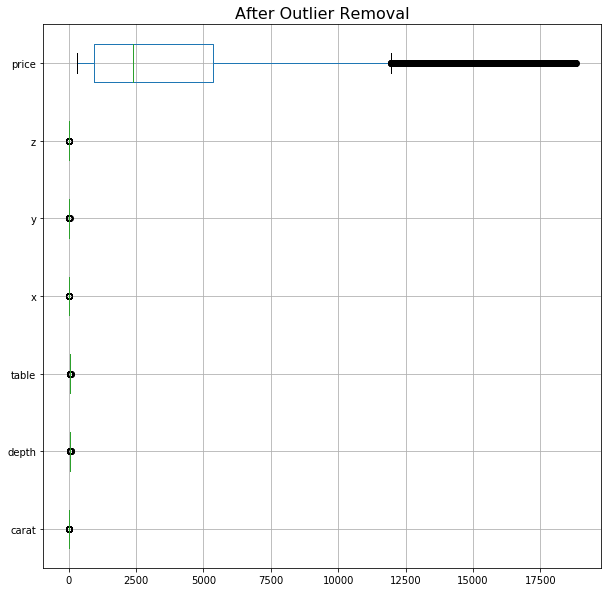

In [25]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

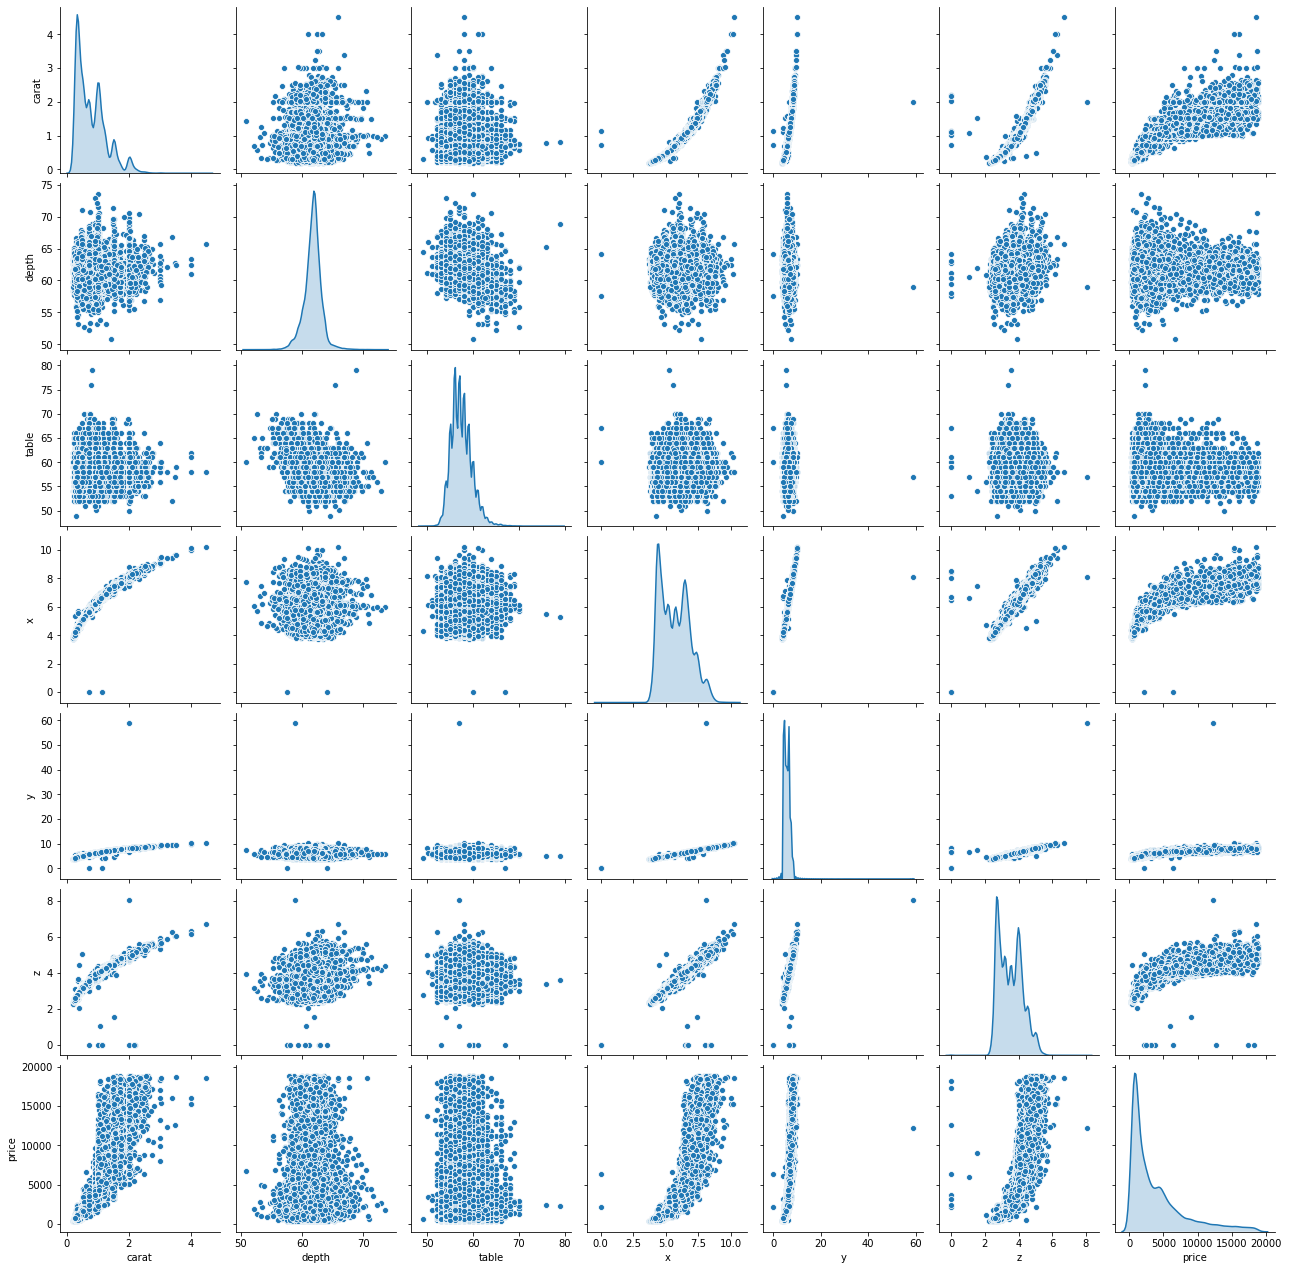

In [122]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

In [123]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [124]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [125]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [126]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11598.572435899456
The coefficient for depth is -58.41336300623816
The coefficient for table is -33.72020661512423
The coefficient for x is -984.8925825944144
The coefficient for y is 16.265206282425993
The coefficient for z is -308.7486838142406
The coefficient for cut_Fair is -552.73328657906
The coefficient for cut_Good is 7.850440980609439
The coefficient for cut_Ideal is 245.745635652905
The coefficient for cut_Premium is 158.3332368213512
The coefficient for cut_Very_Good is 140.80397312419825
The coefficient for color_D is 838.9026246215276
The coefficient for color_E is 638.5021328301345
The coefficient for color_F is 553.4254144604974
The coefficient for color_G is 378.89907672666817
The coefficient for color_H is -172.47222262823706
The coefficient for color_I is -685.2020554072672
The coefficient for color_J is -1552.0549706033246
The coefficient for clarity_I1 is -3760.2199369375335
The coefficient for clarity_IF is 1466.1959196292073
The coeffi

In [128]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 6312.1334244265245


In [129]:
# R square on training data
regression_model.score(X_train, y_train)

0.9225603962407856

50% of the variation in the log_price is explained by the predictors in the model for train set

In [130]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9155883993191013

In [131]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1126.0124100398411

In [132]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1144.2294198959435

### Linear Regression using statsmodels

In [133]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
3712,0.73,55.9,66.0,6.11,6.01,3.39,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2330
1855,1.35,61.9,57.0,7.06,7.09,4.38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,10639
124,2.80,61.1,59.0,9.03,8.98,5.50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,15030
13635,0.41,61.0,56.0,4.79,4.82,2.93,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1187
11233,0.31,61.8,59.0,4.33,4.31,2.67,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1012


In [134]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [135]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [136]:
expr= 'price ~ carat + depth + table + x + y + z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [137]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept         4300.236883
carat            11598.572436
depth              -58.413363
table              -33.720207
x                 -984.892583
y                   16.265206
z                 -308.748684
cut_Fair           307.314090
cut_Good           867.897818
cut_Ideal         1105.793012
cut_Premium       1018.380613
cut_Very_Good     1000.851350
color_D           1453.222179
color_E           1252.821688
color_F           1167.744969
color_G            993.218631
color_H            441.847332
color_I            -70.882501
color_J           -937.735416
clarity_I1       -3222.690327
clarity_IF        2003.725530
clarity_SI1        394.871060
clarity_SI2       -601.823784
clarity_VS1       1300.877111
clarity_VS2       1006.775368
clarity_VVS1      1749.435914
clarity_VVS2      1669.066011
dtype: float64

In [138]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.018e+04
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:56:02   Log-Likelihood:            -1.6618e+05
No. Observations:               19677   AIC:                         3.324e+05
Df Residuals:                   19653   BIC:                         3.326e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4300.2369    514.435      8.359

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [140]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [141]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1126.0124100398384

In [142]:
np.sqrt(lm1.mse_resid) #another way

1126.6997364643155

In [143]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

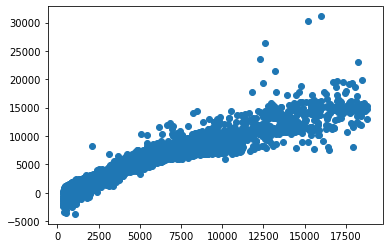

In [146]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [147]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(4300.24) * Intercept + (11598.57) * carat + (-58.41) * depth + (-33.72) * table + (-984.89) * x + (16.27) * y + (-308.75) * z + (307.31) * cut_Fair + (867.9) * cut_Good + (1105.79) * cut_Ideal + (1018.38) * cut_Premium + (1000.85) * cut_Very_Good + (1453.22) * color_D + (1252.82) * color_E + (1167.74) * color_F + (993.22) * color_G + (441.85) * color_H + (-70.88) * color_I + (-937.74) * color_J + (-3222.69) * clarity_I1 + (2003.73) * clarity_IF + (394.87) * clarity_SI1 + (-601.82) * clarity_SI2 + (1300.88) * clarity_VS1 + (1006.78) * clarity_VS2 + (1749.44) * clarity_VVS1 + (1669.07) * clarity_VVS2 + 

 # Conclusion

The final Linear Regression equation is  
  
<b>price = (4300.24) * Intercept + (11598.57) * carat + (-58.41) * depth + (-33.72) * table + (-984.89) * x + (16.27) * y + (-308.75) * z + (307.31) * cut_Fair + (867.9) * cut_Good + (1105.79) * cut_Ideal + (1018.38) * cut_Premium + (1000.85) * cut_Very_Good + (1453.22) * color_D + (1252.82) * color_E + (1167.74) * color_F + (993.22) * color_G + (441.85) * color_H + (-70.88) * color_I + (-937.74) * color_J + (-3222.69) * clarity_I1 + (2003.73) * clarity_IF + (394.87) * clarity_SI1 + (-601.82) * clarity_SI2 + (1300.88) * clarity_VS1 + (1006.78) * clarity_VS2 + (1749.44) * clarity_VVS1 + (1669.07) * clarity_VVS2</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.

